# Multiple Linear Regression on Rothko art data

In [125]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [126]:
# load the art data
data = pd.DataFrame.from_csv('../../data/data.csv')
data = data[['year','shannon_entropy','mean_color_r','luminance','contrast', 'contour']]
data.head()

,year,shannon_entropy,mean_color_r,luminance,contrast,contour
0,1946,6.768127,195.046332,181.738624,0.827169,0.000056
1,1953,6.937948,228.983463,161.723046,0.587802,0.000000
2,1944,6.519651,217.905564,214.564295,0.853499,0.003758
3,1951,6.451747,191.229599,184.080065,0.706196,0.000063
4,1949,5.738259,230.154804,224.799111,0.658131,0.000000


In [127]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168 entries, 0 to 167
Data columns (total 6 columns):
year               168 non-null int64
shannon_entropy    168 non-null float64
mean_color_r       168 non-null float64
luminance          168 non-null float64
contrast           168 non-null float64
contour            168 non-null float64
dtypes: float64(5), int64(1)
memory usage: 9.2 KB


In [128]:
# Split into training and test data
features = data[['shannon_entropy','mean_color_r','luminance','contrast', 'contour']]
target = data['year']
#target = target.apply(lambda x: x.split(",")[0][1:])
features_train, features_test, target_train, target_test = train_test_split(features, target, random_state=41)

In [129]:
# Create a model
model = LinearRegression()

# Fitting our model with all of our features in X
model.fit(features_train, target_train)

score = model.score(features_train, target_train)
print(f"R2 Score: {score}")

R2 Score: 0.4571856231866295


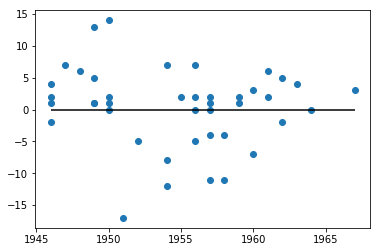

In [130]:
# predict
predictions = model.predict(features_test)
# Plot Residuals
predictions = predictions.round().astype(int)
predictions
target_test = target_test.astype(int)
plt.scatter(predictions, predictions - target_test)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())

In [131]:
score = model.score(features_test, target_test)
print(f"R2 Score: {score}")

R2 Score: 0.5017498830273359


In [132]:
import sklearn
sklearn.metrics.accuracy_score(target_test,predictions)

0.09523809523809523

In [133]:
print("TRUE => PREDICTED")
actuals = target_test.tolist()
for i in range(len(actuals)):
    print(str(actuals[i]) + "=>" + str(predictions[i]))

TRUE => PREDICTED
1957=>1959
1961=>1957
1958=>1959
1948=>1946
1964=>1962
1956=>1956
1957=>1952
1962=>1954
1947=>1954
1955=>1961
1953=>1955
1961=>1956
1964=>1967
1942=>1946
1948=>1950
1962=>1958
1955=>1957
1959=>1961
1936=>1950
1940=>1947
1945=>1946
1957=>1960
1948=>1949
1967=>1960
1948=>1949
1968=>1951
1957=>1962
1969=>1958
1968=>1957
1949=>1956
1964=>1964
1944=>1949
1936=>1949
1942=>1948
1954=>1956
1949=>1950
1959=>1963
1956=>1957
1957=>1957
1950=>1950
1944=>1946
1966=>1954


### Create a data frame of actual and predicted years and then bin both columns separately using the bins and see if the predictions are placed in the correct bins

In [134]:
data_test = pd.DataFrame(data = {"actual": actuals, "predicted": predictions})

In [135]:
data_test.head()

,actual,predicted
0,1957,1959
1,1961,1957
2,1958,1959
3,1948,1946
4,1964,1962


In [136]:
bins = [1935, 1940, 1947, 1950, 1968, 1971]
data_test['actual_year_bin']=pd.cut(data_test['actual'], bins)
data_test['predicted_year_bin']=pd.cut(data_test['predicted'], bins)

In [137]:
data_test["compare"] = data_test["actual_year_bin"] == data_test["predicted_year_bin"]

In [138]:
data_test

,actual,predicted,actual_year_bin,predicted_year_bin,compare
0,1957,1959,"(1950, 1968]","(1950, 1968]",True
1,1961,1957,"(1950, 1968]","(1950, 1968]",True
2,1958,1959,"(1950, 1968]","(1950, 1968]",True
3,1948,1946,"(1947, 1950]","(1940, 1947]",False
4,1964,1962,"(1950, 1968]","(1950, 1968]",True
5,1956,1956,"(1950, 1968]","(1950, 1968]",True
6,1957,1952,"(1950, 1968]","(1950, 1968]",True
7,1962,1954,"(1950, 1968]","(1950, 1968]",True
8,1947,1954,"(1940, 1947]","(1950, 1968]",False
9,1955,1961,"(1950, 1968]","(1950, 1968]",True


In [139]:
# Get the accuracy scores for the bins
sklearn.metrics.accuracy_score(data_test["actual_year_bin"].astype(str).tolist() , data_test["predicted_year_bin"].astype(str).tolist())

0.7857142857142857